# UFC Stats Data Analysis and Creating Insights

I am going to perform a quick exploratory data analysis on the provided dataset, which contains various statistics about UFC fighters.

The dataset includes information such as: 
- Name
- Nickname
- Wins
- Losses
- Draws
- Height (cm)
- Weight (kg)
- Reach (cm)
- Stance
- Date of Birth
- Significant Strikes Landed per Minute
- Significant Striking Accuracy
- Significant Strikes Absorbed per Minute
- Significant Strike Defence
- Average Takedowns Landed per 15 Minutes
- Takedown Accuracy
- Takedown Defense
- Average Submissions Attempted per 15 Minutes

The goal of this analysis is to identify any patterns or trends within the data, such as correlations between physical attributes and performance metrics, or trends in fighting stances and outcomes. This initial exploration will help in understanding the key characteristics and performance indicators of UFC fighters.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = 'C:/Users/nikau/OneDrive/Desktop/My Work/ufc-fighters-statistics.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [4]:
df.tail()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.0,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.0,0.0,0.0,0.0
4110,Pauline Macias,PITA,4,1,0,162.56,52.16,162.56,Southpaw,1988-06-27,0.80,29.0,4.60,42.0,2.0,18.0,0.0,0.0


In [5]:
df.shape

(4111, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [7]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [8]:
# seperating the numerical values into one dataframe

numerical_cols = df.select_dtypes(include=['int64', 'float']).columns

numerical_cols

Index(['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

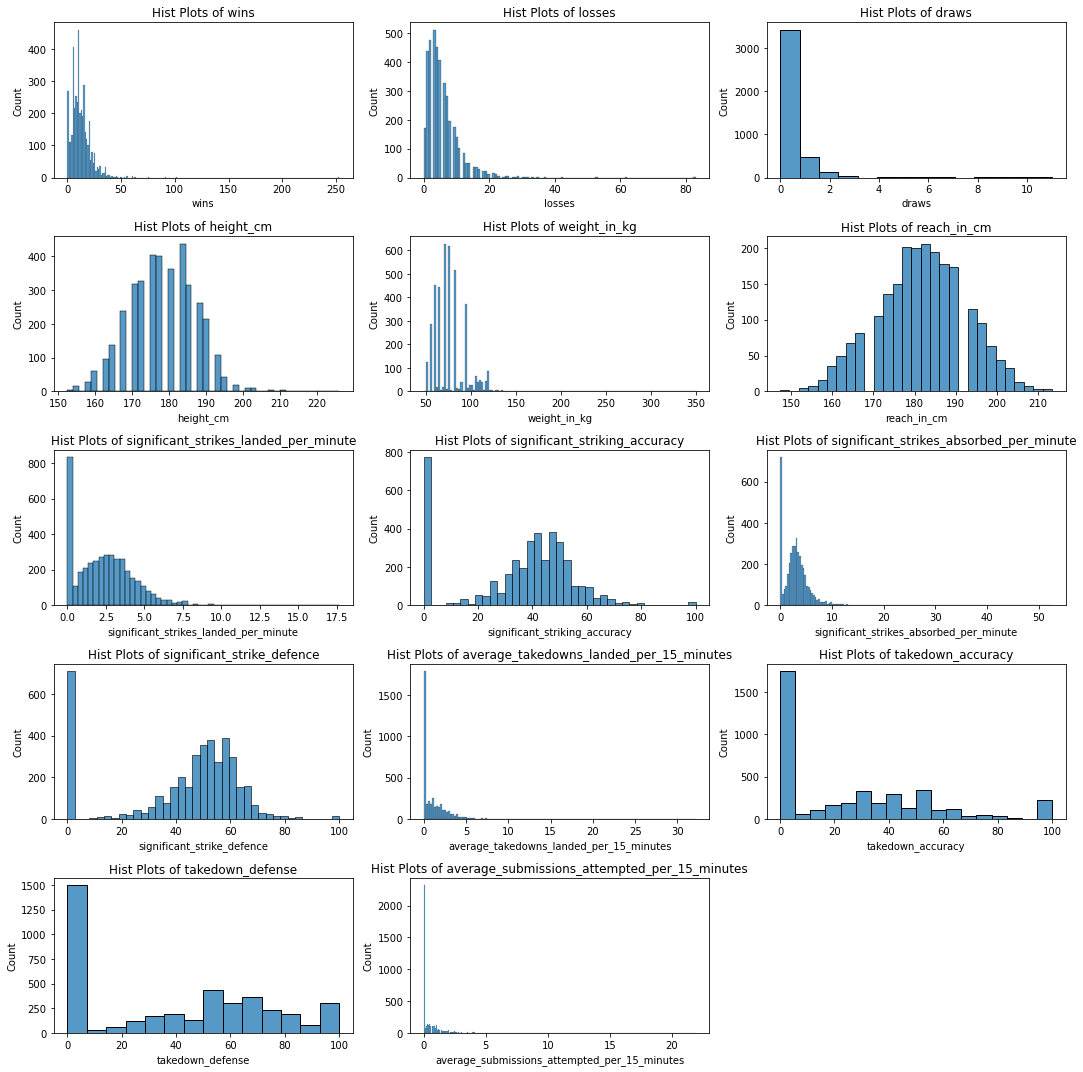

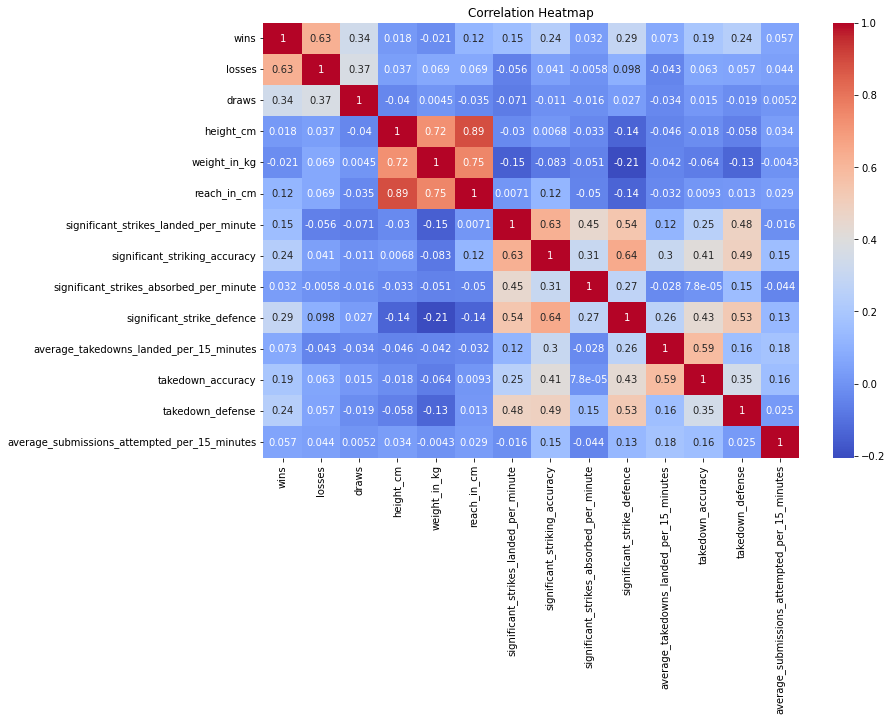

In [9]:
plt.figure(figsize=(15,15))

# Looping through numerical columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5,3, i + 1)
    sns.histplot(df[column])
    plt.title(f'Hist Plots of {column}')
    
plt.tight_layout()
plt.show()

# Plotting a correlation heatmap

plt.figure(figsize=(12,8))
matrix = df.corr()
sns.heatmap(matrix, cmap = 'coolwarm', annot=True)
plt.title('Correlation Heatmap')

plt.show()

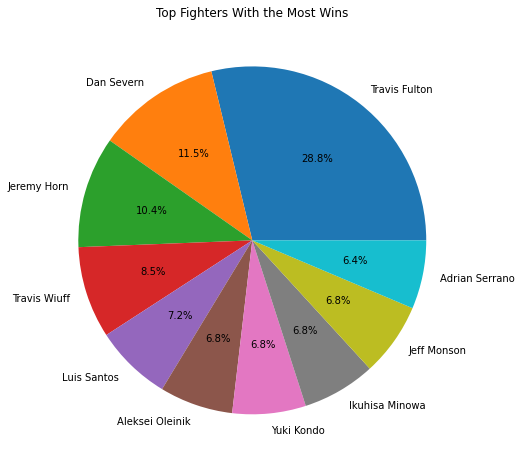

In [50]:
# Who has the most wins in the UFC?
top_10_fighters_sort = df.sort_values(by='wins', ascending=False).head(10)[['name', 'wins']]

# Create a pie chart to show the distribution

plt.figure(figsize=(12,8))
plt.pie(top_10_fighters_sort['wins'], labels = top_10_fighters_sort['name'], radius=1, autopct='%1.1f%%')
plt.title('Top Fighters With the Most Wins')
plt.show()

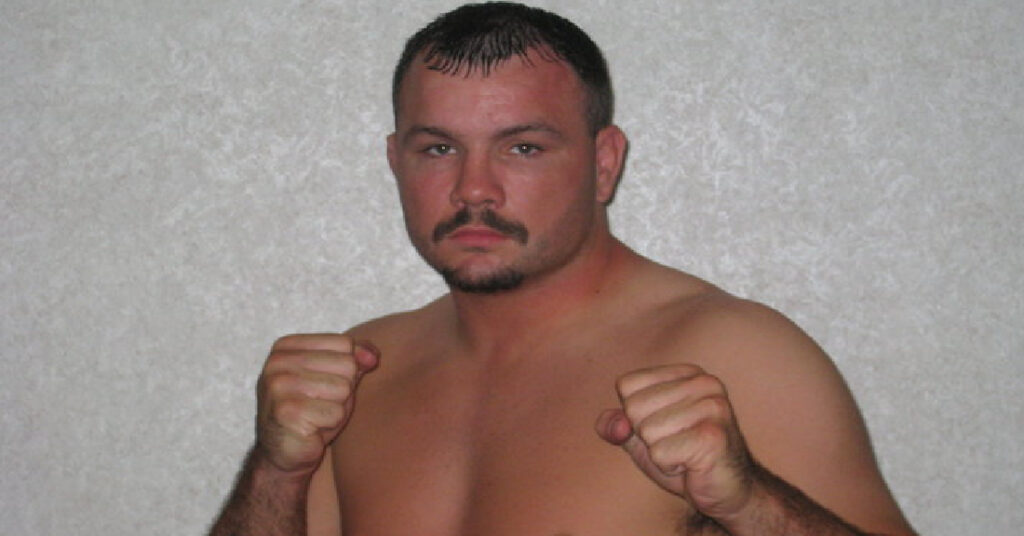

Travis Jon Fulton (May 29, 1977 – July 10, 2021) was an American mixed martial artist and a professional boxer in the heavyweight division of both sports. Known as a longtime veteran in mixed martial arts, he competed in over 300 sanctioned bouts and while he was perhaps best known for competing in smaller US-based promotions, he also competed in the UFC, the USWF, the WEC, Pancrase, M-1 Global, the Chicago Red Bears of the IFL, King of the Cage, RINGS, and Oktagon MMA.

In [61]:
df.iloc[3969]

name                                            Travis Fulton
nickname                                          The Ironman
wins                                                      253
losses                                                     53
draws                                                      10
height_cm                                              182.88
weight_in_kg                                           108.86
reach_in_cm                                               NaN
stance                                               Orthodox
date_of_birth                                      1977-05-29
significant_strikes_landed_per_minute                     0.0
significant_striking_accuracy                             0.0
significant_strikes_absorbed_per_minute                   0.0
significant_strike_defence                                0.0
average_takedowns_landed_per_15_minutes                   0.0
takedown_accuracy                                         0.0
takedown

<function matplotlib.pyplot.show(close=None, block=None)>

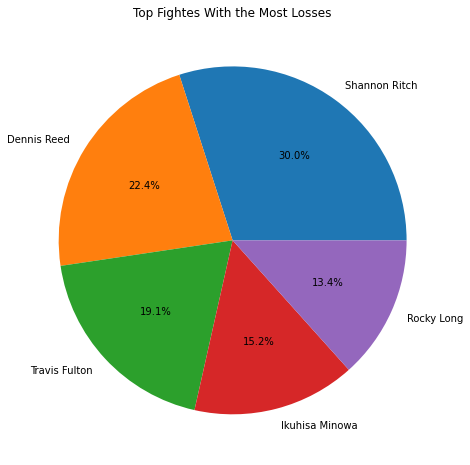

In [56]:
# who has the least amount of wins?

most_losses = df.sort_values(by='losses', ascending=False).head()[['name', 'losses']]
most_losses

# Create a pie chart to show the distribution
plt.figure(figsize=(12,8))
plt.pie(most_losses['losses'], labels = most_losses['name'], radius = 1, autopct= '%1.1f%%')
plt.title('Top Fightes With the Most Losses')
plt.show

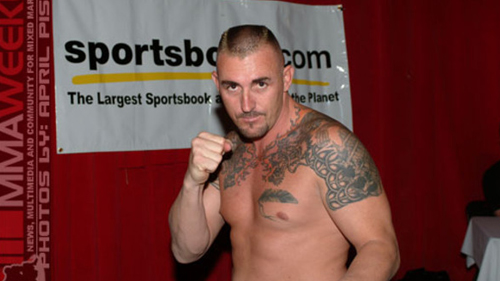

Shannon Grey Ritch[1] (born September 27, 1970) is an American professional mixed martial artist, boxer, grappler, professional wrestler and kickboxer. In mixed martial arts competition he is the former King of the Cage Middleweight Champion and the inaugural BKFC International Heavyweight Champion in bare-knuckle boxing. A professional competitor since 1998, Ritch has competed for M-1 Global, Combate Americas, MFC, Shark Fights, Pancrase, Battlarts, K-1, Bare Knuckle Fighting Championship, PRIDE, Rebel Fighting Championship, New Japan Pro-Wrestling, King of the Cage, Gladiator Challenge, Hart Legacy Wrestling and the WEC.

In [110]:
# Who is the top striker amongst fighters

top_strikers = df.nlargest(10, 'significant_strikes_landed_per_minute')[['name','significant_strikes_landed_per_minute']].reset_index(drop=True)
top_strikers

,name,significant_strikes_landed_per_minute
0,Rex Richards,17.65
1,Luana Santos,17.10
2,Cortavious Romious,14.48
3,Danny Silva,13.60
4,Angel Pacheco,13.13
5,Charalampos Grigoriou,13.00
6,JR Coughran,12.29
7,Ernesta Kareckaite,12.27
8,Danny Barlow,12.15
9,Kim Couture,12.12


<AxesSubplot:xlabel='significant_strikes_landed_per_minute', ylabel='name'>

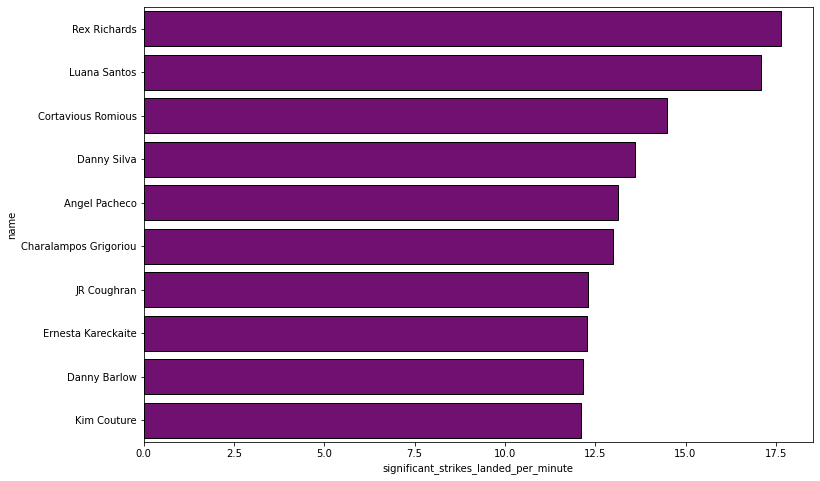

In [133]:
# PLot the Graph
plt.figure(figsize=(12,8))
sns.barplot(data = top_strikers, x = 'significant_strikes_landed_per_minute', y = 'name', color = 'purple', edgecolor = 'black')

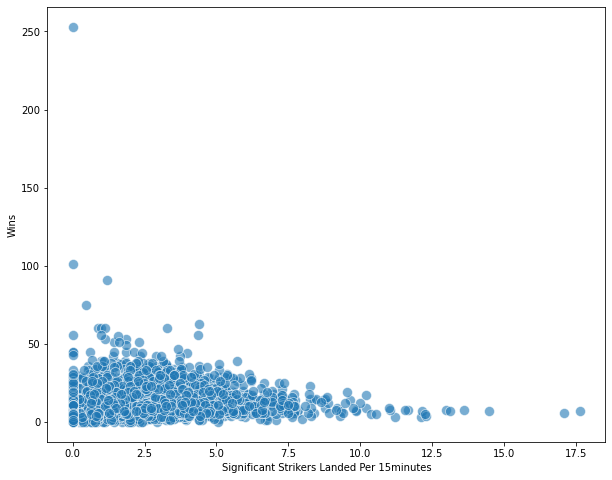

In [139]:
# Scatterplot looking at the relatioship between wins and significant strikes


plt.figure(figsize = (10,8))
sns.scatterplot(x = 'significant_strikes_landed_per_minute', y = 'wins', data = df, alpha = 0.6, edgecolors = 'w', s=100)
plt.xlabel('Significant Strikers Landed Per 15minutes')
plt.ylabel('Wins')
plt.show()

In [77]:
df.iloc[3722]

name                                            Rex Richards
nickname                                                 NaN
wins                                                       7
losses                                                     2
draws                                                      0
height_cm                                             195.58
weight_in_kg                                           120.2
reach_in_cm                                              NaN
stance                                                   NaN
date_of_birth                                            NaN
significant_strikes_landed_per_minute                  17.65
significant_striking_accuracy                           58.0
significant_strikes_absorbed_per_minute                 5.29
significant_strike_defence                              72.0
average_takedowns_landed_per_15_minutes                  0.0
takedown_accuracy                                        0.0
takedown_defense        

Rex Richard is the top striker in this list according to the stats he has the highest sig stirkers landed per minute with 17.65. However his record is only 7W - 2L with a total of 9 bouts. His sig strike accuracy is only so high due the the limited amount of fights that Richard has on his record.

In [76]:
top_takedowns = df.nlargest(10, 'average_takedowns_landed_per_15_minutes')[['name', 'average_takedowns_landed_per_15_minutes']]
top_takedowns

,name,average_takedowns_landed_per_15_minutes
1794,Tom Tuggle,32.14
1930,Leonardo Silva de Oliveira,24.11
3843,Rafael Del Real,20.93
2445,Colley Bradford,19.42
2500,Michael Mangan,19.35
3401,Mario Piazzon,18.87
2212,George Bush,17.31
4096,Eperaim Ginting,15.52
3329,Davi Bittencourt,14.15
3173,Shin Haraguchi,14.01


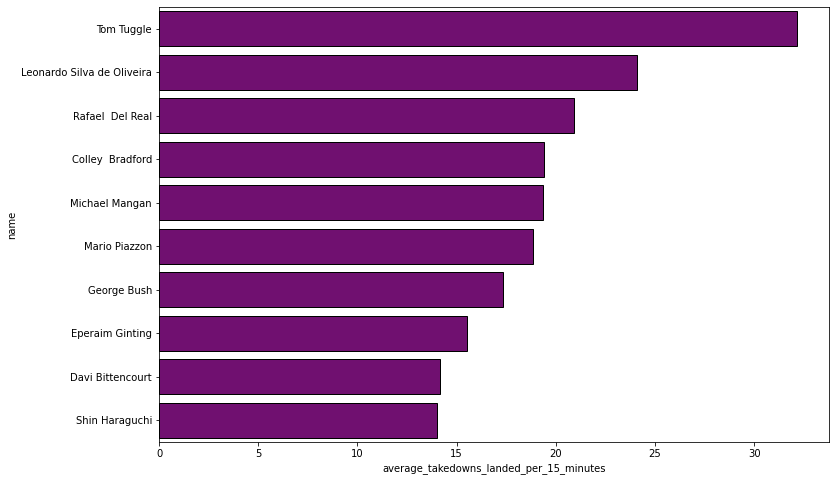

In [113]:
plt.figure(figsize=(12,8))
sns.barplot(data = top_takedowns, x = 'average_takedowns_landed_per_15_minutes', y = 'name', color = 'purple', edgecolor = 'black')
plt.show()

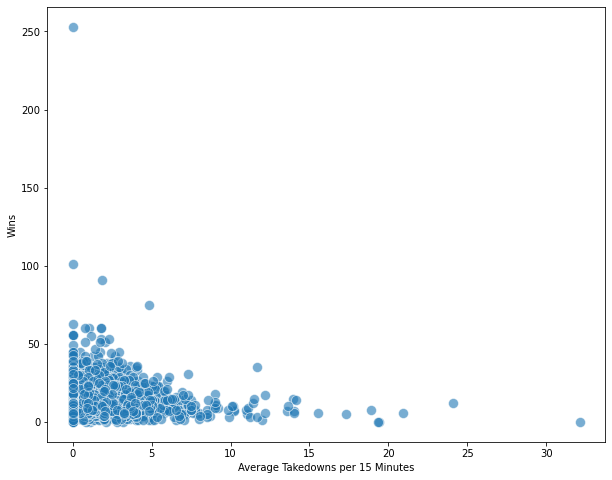

In [141]:
# Scatterplot showint the relationship between takedowns landed and wins

plt.figure(figsize=(10,8))
sns.scatterplot(x = 'average_takedowns_landed_per_15_minutes', y = 'wins', data = df, alpha = 0.6, edgecolors = 'w', s=100)
plt.xlabel('Average Takedowns per 15 Minutes')
plt.ylabel('Wins')
plt.show()

In [79]:
df.iloc[1794]

name                                            Tom Tuggle
nickname                                           The Law
wins                                                     0
losses                                                   3
draws                                                    0
height_cm                                           187.96
weight_in_kg                                         113.4
reach_in_cm                                            NaN
stance                                            Orthodox
date_of_birth                                          NaN
significant_strikes_landed_per_minute                  0.0
significant_striking_accuracy                          0.0
significant_strikes_absorbed_per_minute               2.14
significant_strike_defence                             0.0
average_takedowns_landed_per_15_minutes              32.14
takedown_accuracy                                    100.0
takedown_defense                                       0

Tom 'The Law' Tuggle has the highest takedown average per 15minutes in this list. The data is quite misleading as it indicates that Tom lands an average of 32 takedowns every 15minutes which sounds egregious. This fighter has only had 3 fights on his record and he lost all of them.

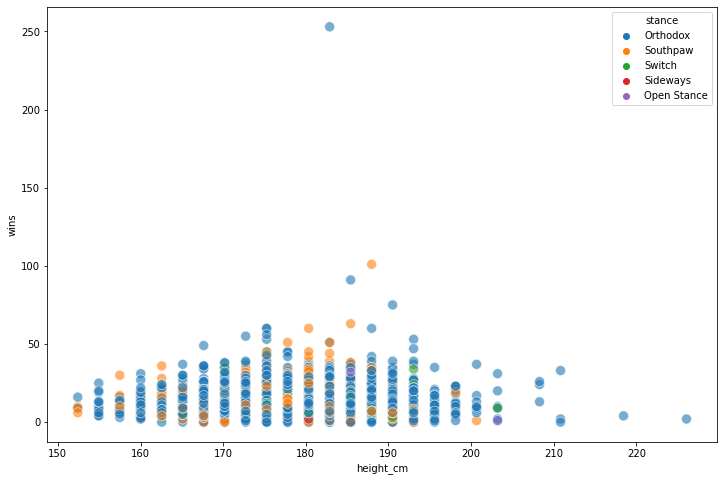

In [92]:
# Is Height important in winning fights?

plt.figure(figsize=(12,8))
sns.scatterplot(x = 'height_cm', y = 'wins', data = df, alpha = 0.6, edgecolors = 'w', s=100, hue = 'stance')
plt.show()

In [93]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


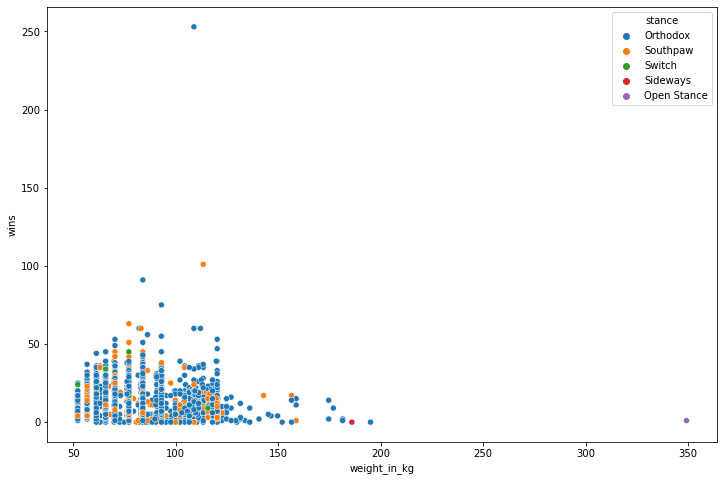

In [99]:
# Is weight important in winning fights?

plt.figure(figsize=(12,8))
sns.scatterplot(x = 'weight_in_kg', y = 'wins', data = df, edgecolors = 'w', hue = 'stance')
plt.show()

In [114]:
df.head()

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [116]:
from datetime import datetime

# Calculate age
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

df['age'] = df['date_of_birth'].apply(lambda dob: datetime.now().year - dob.year if pd.notnull(dob) else None)

In [122]:
median_age = df['age'].mean()
median_age.round()

39.0

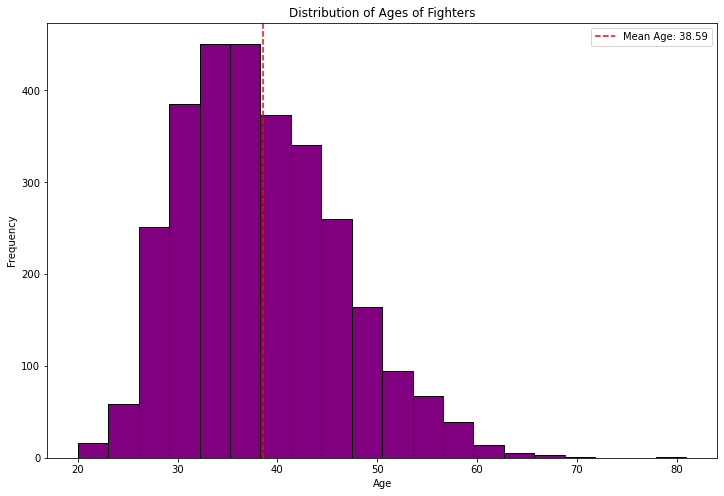

In [132]:
# Plot age distribution
plt.figure(figsize=(12, 8))
plt.hist(df['age'].dropna(), bins=20, color='purple', edgecolor='black')

plt.axvline(median_age, color='r', linestyle='--', label=f'Mean Age: {median_age:.2f}')
plt.title('Distribution of Ages of Fighters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The exploratory data analysis (EDA) on the UFC fighters' statistics dataset has been successfully concluded. The analysis covered various aspects of the dataset, including fighter demographics (such as height, weight), performance metrics (such as significant strikes and takedowns), and their outcomes in terms of wins, losses, and draws. Patterns and trends were identified, providing insights into the key characteristics and performance indicators of UFC fighters. This initial exploration lays the groundwork for further in-depth analysis and model building.